<a href="https://colab.research.google.com/github/shimaaahmedd/Stereo-vision/blob/main/Stereo_vision_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

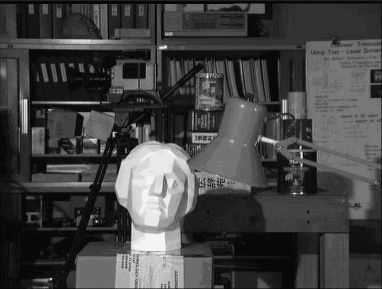

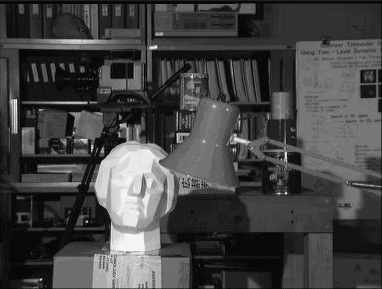

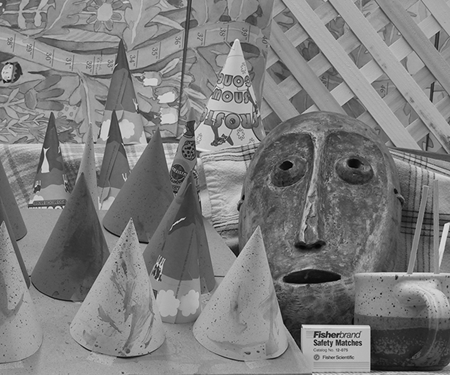

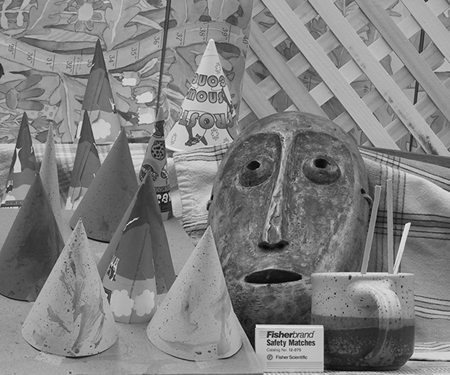

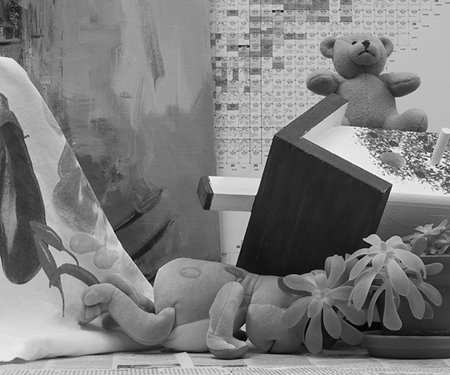

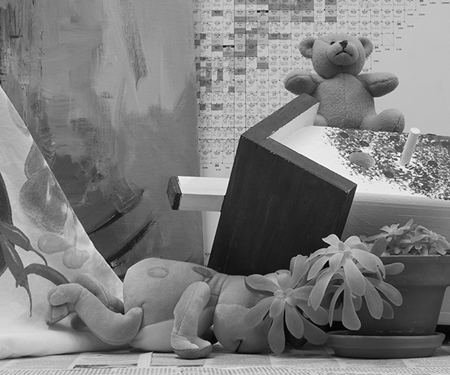

In [ ]:
img_L1=cv2.imread('/content/drive/MyDrive/Stereo Dataset/l1.png',0)
img_R1=cv2.imread('/content/drive/MyDrive/Stereo Dataset/r1.png',0)

img_L2=cv2.imread('/content/drive/MyDrive/Stereo Dataset/l2.png',0)
img_R2=cv2.imread('/content/drive/MyDrive/Stereo Dataset/r2.png',0)

img_L3=cv2.imread('/content/drive/MyDrive/Stereo Dataset/l3.png',0)
img_R3=cv2.imread('/content/drive/MyDrive/Stereo Dataset/r3.png',0)

cv2_imshow(img_L1)
cv2_imshow(img_R1)

cv2_imshow(img_L2)
cv2_imshow(img_R2)

cv2_imshow(img_L3)
cv2_imshow(img_R3)

In [ ]:
def slider(window_size, i, j, img):
  w = window_size // 2        # 2
  row1 = -1*w+i   #-2
  row2 = w + i   # 2
  col1 = -1*w+j  #-2
  col2 = w+j   # 2

  if row1 < 0:
    row1 = 0
  if row2 > img.shape[0] - 1:
    row2 = img.shape[0] - 1
  if col1 < 0:
    col1 = 0
  if col2 > img.shape[1] - 1:
    col2 = img.shape[1] - 1
  sub_matrix = img[row1:row2+1, col1:col2 + 1]
  # sum= np.sum(sub_matrix)
  return sub_matrix

In [ ]:
def Block_Matching(imgL,imgR,window_size):
  min_index_SAD = imgL.shape[1]
  min_SAD=255*imgL.shape[1]
  disparity_index_SAD = np.zeros(imgL.shape)
  disparity_value_SAD = np.zeros(imgL.shape)
  min_index_SSD = imgL.shape[1]
  min_SSD=np.square(255*imgL.shape[1])
  disparity_index_SSD = np.zeros(imgL.shape)
  disparity_value_SSD = np.zeros(imgL.shape)
  x = window_size//2
  for i in range(x, imgL.shape[0]-x):
     for j in range(x, imgL.shape[1]-x):
        temp = slider(window_size, i, j, imgL)
        min_SAD=255*imgL.shape[1]
        min_SSD=np.square(255*imgL.shape[1])
        for r in range(x, imgR.shape[1]-x):
          sum_SAD=0
          sum_SSD=0
          right_img = slider(window_size, i, r, imgR)
          sum_SAD = np.sum(abs(temp - right_img))
          sum_SSD = np.sum(np.square(temp - right_img))
          if sum_SAD < min_SAD:
            min_SAD = sum_SAD
            min_index_SAD=r 
          if sum_SSD < min_SSD:
            min_SSD = sum_SSD
            min_index_SSD=r 
        disparity_index_SAD[i][j]=abs(j-min_index_SAD)
        disparity_value_SAD[i][j]=min_SAD
        disparity_index_SSD[i][j]=abs(j-min_index_SSD)
        disparity_value_SSD[i][j]=min_SSD

  return disparity_index_SAD, disparity_value_SAD, disparity_index_SSD, disparity_value_SSD

In [ ]:
def Build_Disparity_DP(img_L,img_R):
  c0=1
  sigma=2
  Ds=[]
  for r in range(0,img_L.shape[0]):
    D=np.zeros((img_L.shape[1],img_L.shape[1]))
    for i in range(img_L.shape[1]):
      for j in range(img_L.shape[1]):
        if i==0 and j==0:
          D[i][j]=((img_L[r][0]-img_R[r][0])**2)/(sigma**2)
        elif i==0 and j!=0:
          D[0][j]=j*c0
        elif j==0 and i!=0:
          D[i][0]=i*c0 
        else:
          dij=((img_L[r][i]-img_R[r][j])**2)/(sigma**2)
          D[i][j]=min(D[i-1][j-1]+dij,min(D[i-1][j]+c0,D[i][j-1]+c0))
    Ds.append(D)
  
  return Ds

In [ ]:
def Backtracking(img_L,img_R,Ds):
  DR=np.zeros(img_R.shape)
  DL=np.zeros(img_L.shape)
  columns=[]
  row=0
  for k in range(img_R.shape[0]):
   col_graph=np.zeros((img_L.shape[1],img_L.shape[1]))
   i=img_L.shape[1]-1
   j=img_L.shape[1]-1
   DR[row][j]=i-j
   DL[row][j]=j-i
   col_graph[i][j]=255
   while i!=0 and j!=0:
     if i-1>0 and j-1>0:
         diagonal_value=Ds[k][i-1][j-1]
     if i-1>0:
         up_value=Ds[k][i-1][j]
     if j-1>0:
         left_value=Ds[k][i][j-1]
     
     temp=min(diagonal_value,min(up_value,left_value))
  
     if temp== diagonal_value:
       DR[row][j-1]=abs((i-1)-(j-1))
       DL[row][i-1]=abs((j-1)-(i-1))
       j=j-1
       i=i-1
       col_graph[i][j]=255
     elif temp==up_value:
        i=i-1
        col_graph[i][j]=255
     else:
        j=j-1
        col_graph[i][j]=255
   columns.append(col_graph)
   row=row+1
  
  return DR,DL,columns

**(SAD) First image of windows = 1**


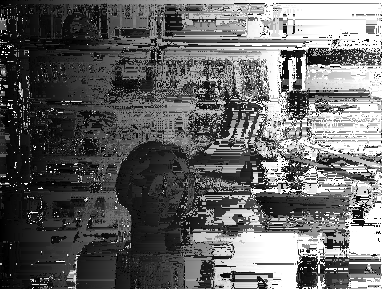

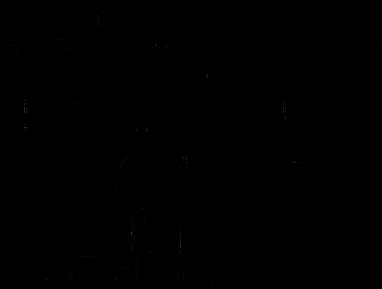

In [ ]:
disparity_index_I1_W1_SAD, disparity_value_I1_W1_SAD, disparity_index_I1_W1_SSD, disparity_value_I1_W1_SSD=Block_Matching(img_L1,img_R1,1)
cv2_imshow(disparity_index_I1_W1_SAD)
cv2_imshow(disparity_value_I1_W1_SAD)

**(SSD) First image of windows = 1**

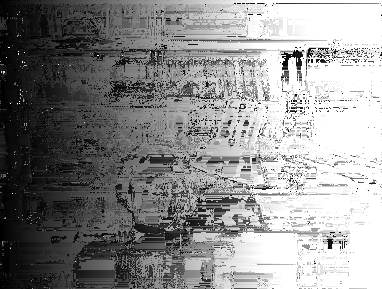

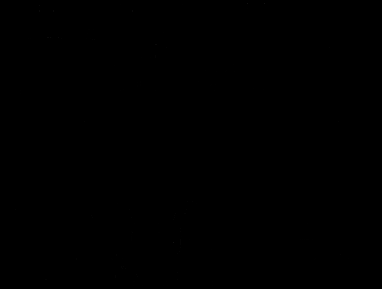

In [ ]:
cv2_imshow(disparity_index_I1_W1_SSD)
cv2_imshow(disparity_value_I1_W1_SSD)

**(SAD) First image of windows = 5**

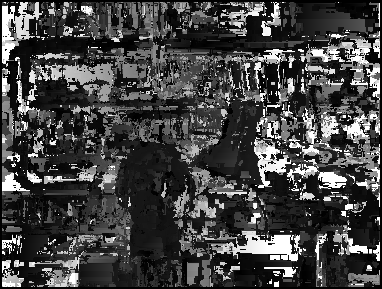

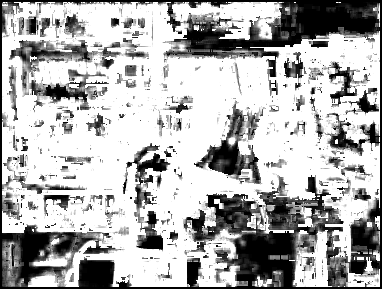

In [ ]:
disparity_index_I1_W5_SAD, disparity_value_I1_W5_SAD, disparity_index_I1_W5_SSD, disparity_value_I1_W5_SSD=Block_Matching(img_L1,img_R1,5)
cv2_imshow(disparity_index_I1_W5_SAD)
cv2_imshow(disparity_value_I1_W5_SAD)

**(SSD) First image of windows = 5**

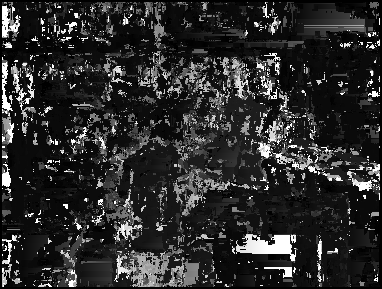

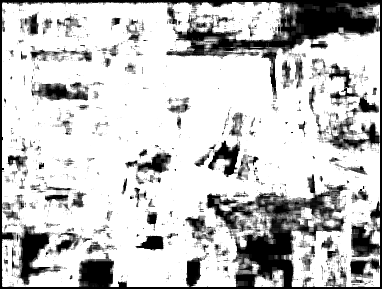

In [ ]:
cv2_imshow(disparity_index_I1_W5_SSD)
cv2_imshow(disparity_value_I1_W5_SSD)

**(SAD) First image of windows = 9**

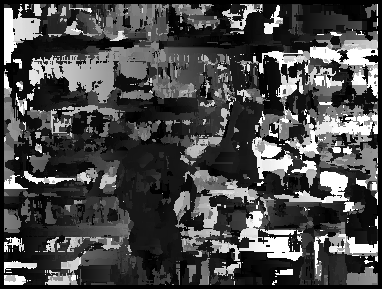

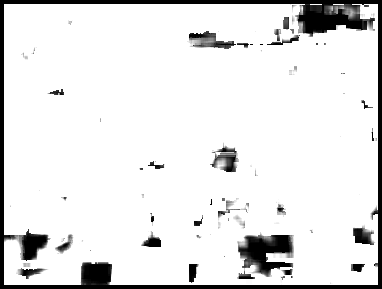

In [ ]:
disparity_index_I1_W9_SAD, disparity_value_I1_W9_SAD, disparity_index_I1_W9_SSD, disparity_value_I1_W9_SSD=Block_Matching(img_L1,img_R1,9)
cv2_imshow(disparity_index_I1_W9_SAD)
cv2_imshow(disparity_value_I1_W9_SAD)

**(SSD) First image of windows = 9**

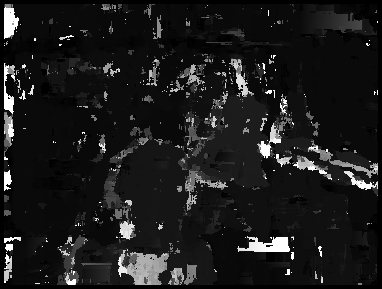

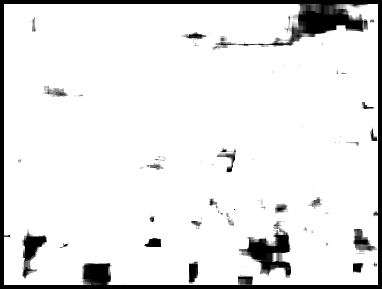

In [ ]:
cv2_imshow(disparity_index_I1_W9_SSD)
cv2_imshow(disparity_value_I1_W9_SSD)

**(SAD) Second image of windows = 1**

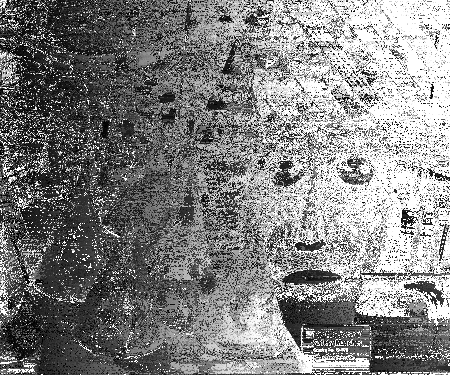

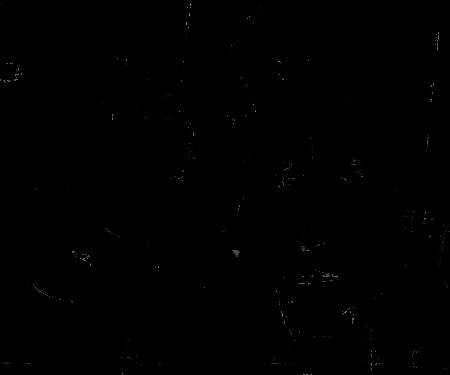

In [ ]:
disparity_index_I2_W1_SAD, disparity_value_I2_W1_SAD, disparity_index_I2_W1_SSD, disparity_value_I2_W1_SSD=Block_Matching(img_L2,img_R2,1)
cv2_imshow(disparity_index_I2_W1_SAD)
cv2_imshow(disparity_value_I2_W1_SAD)

**(SSD) Second image of windows = 1**

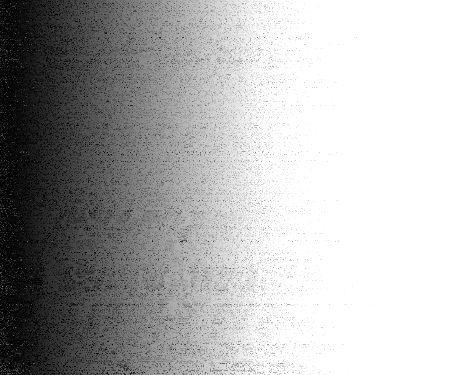

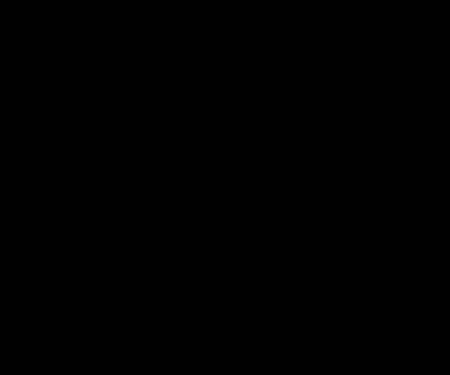

In [ ]:
cv2_imshow(disparity_index_I2_W1_SSD)
cv2_imshow(disparity_value_I2_W1_SSD)

**(SAD) Second image of windows = 5**

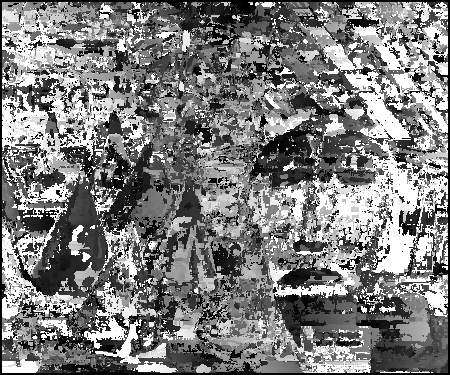

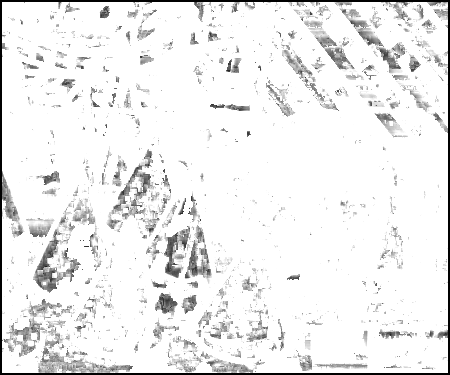

In [ ]:
disparity_index_I2_W5_SAD, disparity_value_I2_W5_SAD, disparity_index_I2_W5_SSD, disparity_value_I2_W5_SSD=Block_Matching(img_L2,img_R2,5)
cv2_imshow(disparity_index_I2_W5_SAD)
cv2_imshow(disparity_value_I2_W5_SAD)

**(SSD) Second image of windows = 5**

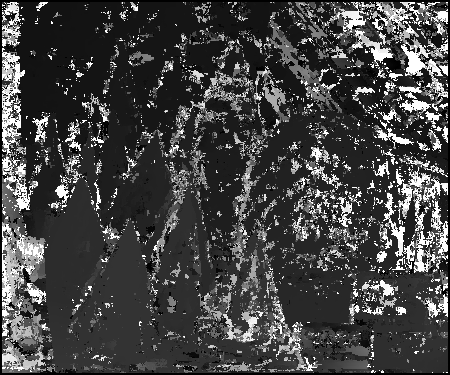

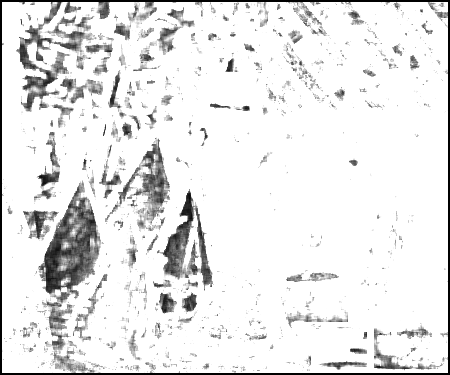

In [ ]:
cv2_imshow(disparity_index_I2_W5_SSD)
cv2_imshow(disparity_value_I2_W5_SSD)

**(SAD) Second image of windows = 9**

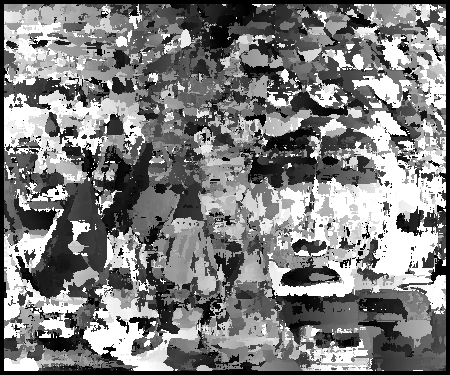

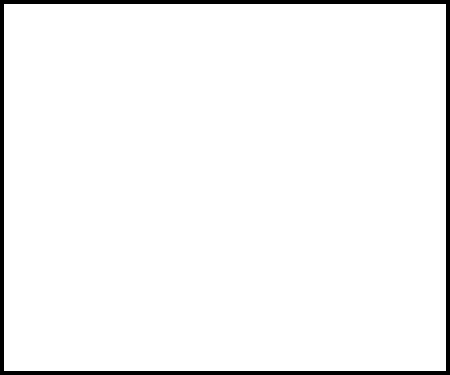

In [ ]:
disparity_index_I2_W9_SAD, disparity_value_I2_W9_SAD, disparity_index_I2_W9_SSD, disparity_value_I2_W9_SSD=Block_Matching(img_L2,img_R2,9)
cv2_imshow(disparity_index_I2_W9_SAD)
cv2_imshow(disparity_value_I2_W9_SAD)

**(SSD) Second image of windows = 9**

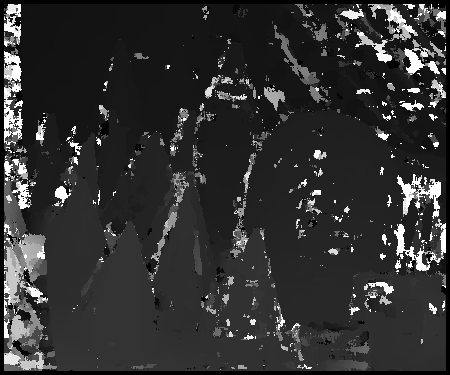

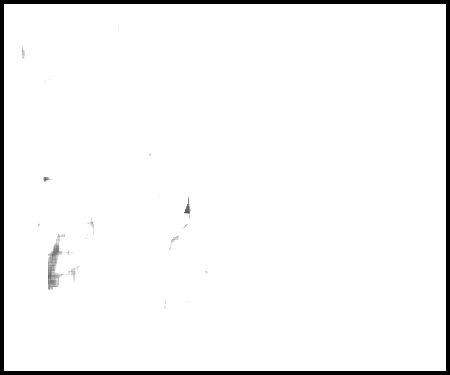

In [ ]:
cv2_imshow(disparity_index_I2_W9_SSD)
cv2_imshow(disparity_value_I2_W9_SSD)

**(SAD) Third image of windows = 1**

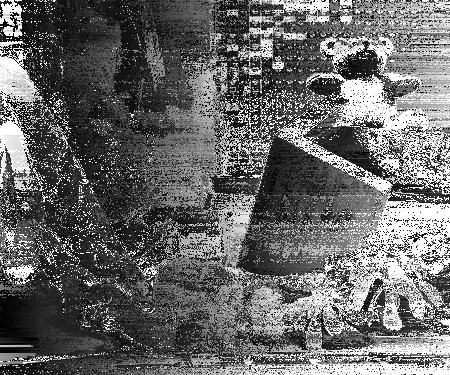

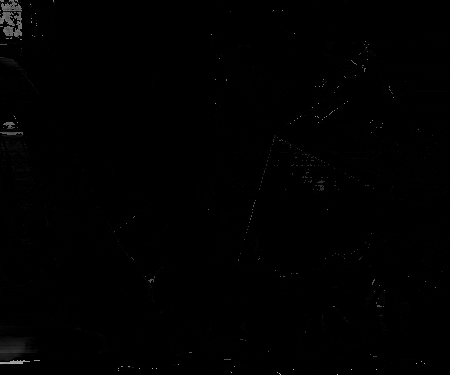

In [ ]:
disparity_index_I3_W1_SAD, disparity_value_I3_W1_SAD, disparity_index_I3_W1_SSD, disparity_value_I3_W1_SSD=Block_Matching(img_L3,img_R3,1)
cv2_imshow(disparity_index_I3_W1_SAD)
cv2_imshow(disparity_value_I3_W1_SAD)

**(SSD) Third image of windows = 1**

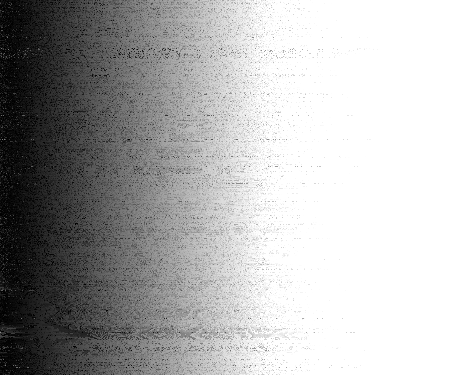

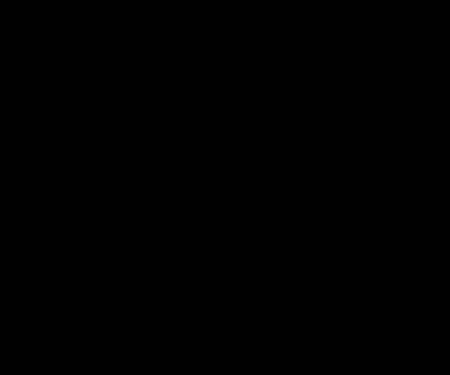

In [ ]:
cv2_imshow(disparity_index_I3_W1_SSD)
cv2_imshow(disparity_value_I3_W1_SSD)

**(SAD) Third image of windows = 5**

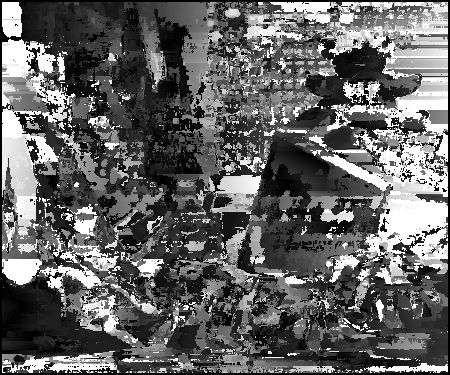

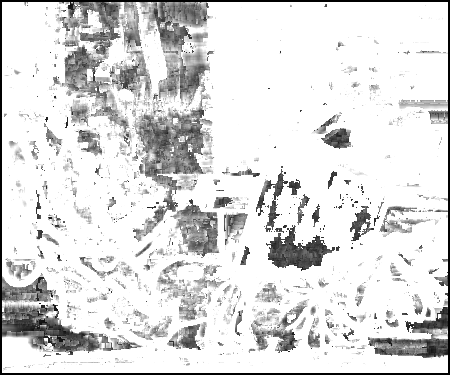

In [ ]:
disparity_index_I3_W5_SAD, disparity_value_I3_W5_SAD, disparity_index_I3_W5_SSD, disparity_value_I3_W5_SSD=Block_Matching(img_L3,img_R3,5)
cv2_imshow(disparity_index_I3_W5_SAD)
cv2_imshow(disparity_value_I3_W5_SAD)

**(SSD) Third image of windows = 5**

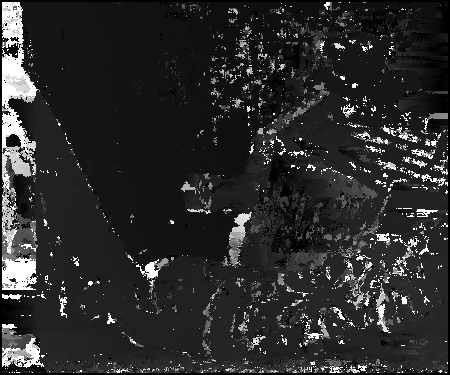

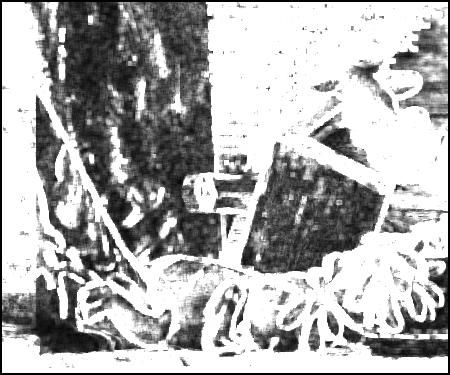

In [ ]:
cv2_imshow(disparity_index_I3_W5_SSD)
cv2_imshow(disparity_value_I3_W5_SSD)

**(SAD) Third image of windows = 9**

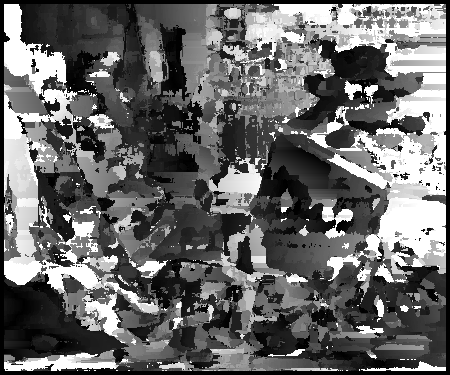

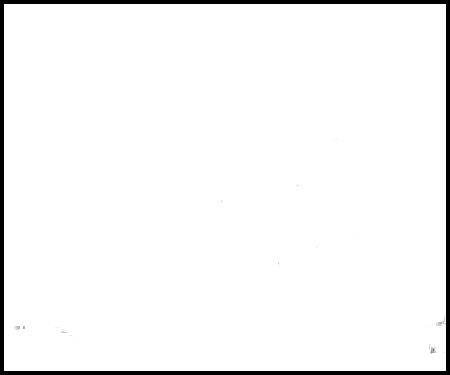

In [ ]:
disparity_index_I3_W9_SAD, disparity_value_I3_W9_SAD, disparity_index_I3_W9_SSD, disparity_value_I3_W9_SSD=Block_Matching(img_L3,img_R3,9)
cv2_imshow(disparity_index_I3_W9_SAD)
cv2_imshow(disparity_value_I3_W9_SAD)

**(SSD) Third image of windows = 9**

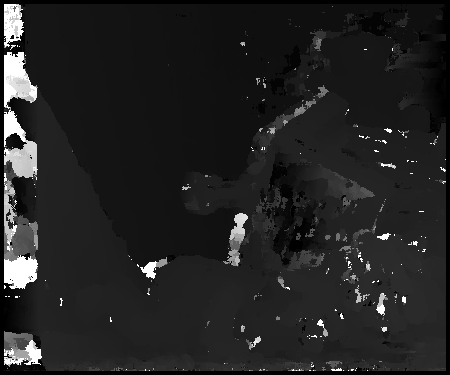

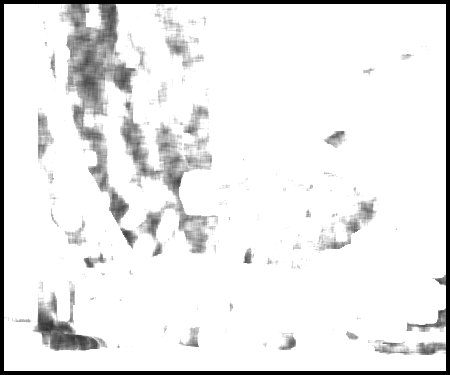

In [ ]:
cv2_imshow(disparity_index_I3_W9_SSD)
cv2_imshow(disparity_value_I3_W9_SSD)

**(Dynamic programming) First image**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


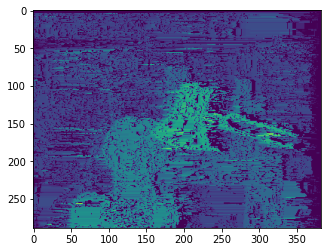

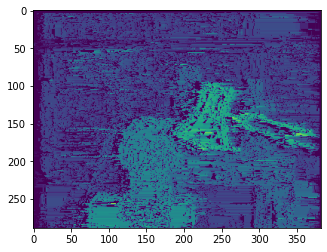

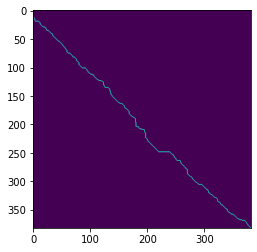

In [ ]:
D_1=Build_Disparity_DP(img_L1,img_R1)
DR_1,DL_1,columns_1=Backtracking(img_L1,img_R1,D_1)
plt.imshow(DR_1)
plt.figure()
plt.imshow(DL_1)
plt.figure()
plt.imshow(columns_1[100])

**(Dynamic programming) Second image**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


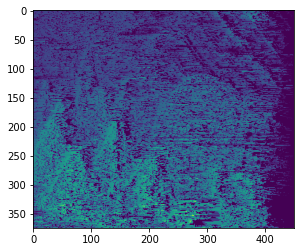

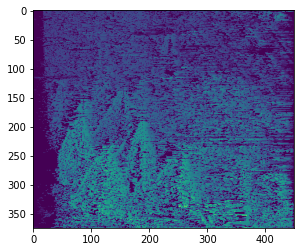

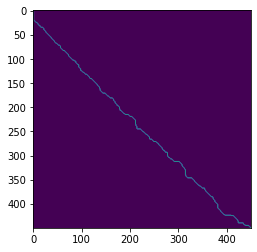

In [ ]:
D_2=Build_Disparity_DP(img_L2,img_R2)
DR_2,DL_2,columns_2=Backtracking(img_L2,img_R2,D_2)
plt.imshow(DR_2)
plt.figure()
plt.imshow(DL_2)
plt.figure()
plt.imshow(columns_2[100])

**(Dynamic programming) Third image**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


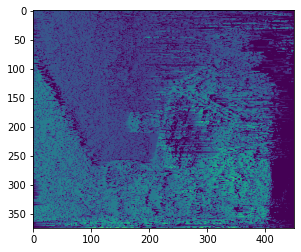

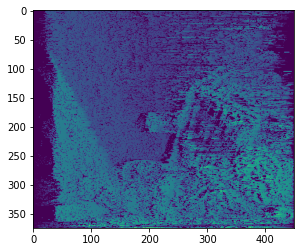

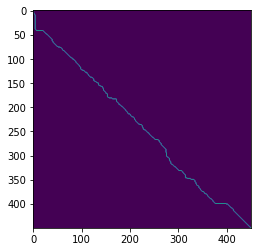

In [ ]:
D_3=Build_Disparity_DP(img_L3,img_R3)
DR_3,DL_3,columns_3=Backtracking(img_L3,img_R3,D_3)
plt.imshow(DR_3)
plt.figure()
plt.imshow(DL_3)
plt.figure()
plt.imshow(columns_3[100])